In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import scvi

sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.5 umap==0.4.6 numpy==1.19.2 scipy==1.5.2 pandas==1.0.5 scikit-learn==0.23.2 statsmodels==0.12.1


In [2]:
SCRNA_DIR = '../data/gayoso-2020/'
SCCITE_DIR = '../data/gayoso-2020/'

# Load data

In [4]:
scrna = scvi.data.spleen_lymph_cite_seq(save_path='../data/gayoso-2020/', run_setup_anndata=False)

INFO     Downloading file at ../data/gayoso-2020/sln_111.h5ad                                
Downloading...: 100%|██████████| 66657/66657.0 [01:50<00:00, 604.83it/s] 
INFO     Downloading file at ../data/gayoso-2020/sln_208.h5ad                                
Downloading...: 100%|██████████| 70490/70490.0 [01:42<00:00, 689.06it/s] 


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [6]:
scrna.obs_names_make_unique()

In [7]:
list(scrna.obsm['isotypes_htos'].index) == list(scrna.obs_names)

True

In [8]:
cite = ad.AnnData(scrna.obsm['protein_expression'])

In [9]:
cite.obs = scrna.obs

In [10]:
cite

AnnData object with n_obs × n_vars = 30474 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'

In [11]:
del scrna.obsm

# Preprocess RNA-seq

In [12]:
sc.pp.filter_cells(scrna, min_genes=1)
sc.pp.filter_genes(scrna, min_cells=1)
scrna

AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'

In [13]:
scrna.raw = scrna

## Quality Control

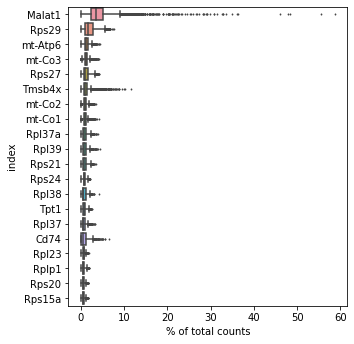

In [14]:
sc.pl.highest_expr_genes(scrna, n_top=20)

In [15]:
sc.pp.calculate_qc_metrics(scrna, percent_top=None, inplace=True)
scrna

AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

... storing 'batch' as categorical
/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/seaborn/_core.py:131

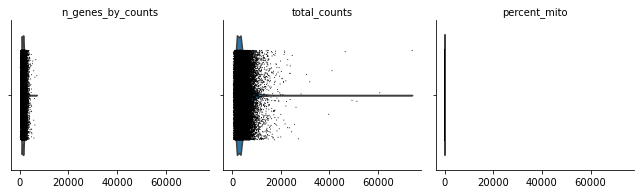

In [16]:
sc.pl.violin(scrna, ['n_genes_by_counts', 'total_counts', 'percent_mito'], jitter=0.3, multi_panel=True)

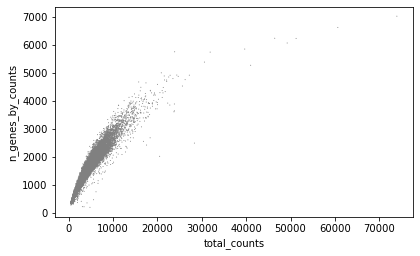

In [17]:
sc.pl.scatter(scrna, x='total_counts', y='n_genes_by_counts')

In [18]:
sc.pp.filter_cells(scrna, min_genes=100)
sc.pp.filter_genes(scrna, min_cells=3)
scrna = scrna[scrna.obs.n_genes_by_counts < 3500, :]
scrna

View of AnnData object with n_obs × n_vars = 30293 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Normalization

In [19]:
sc.pp.normalize_total(scrna, target_sum=1e4)
sc.pp.log1p(scrna)

/Users/alitinet/opt/miniconda3/envs/scvi/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Visualization

In [20]:
sc.tl.pca(scrna, random_state=0, svd_solver='arpack', n_comps=50)

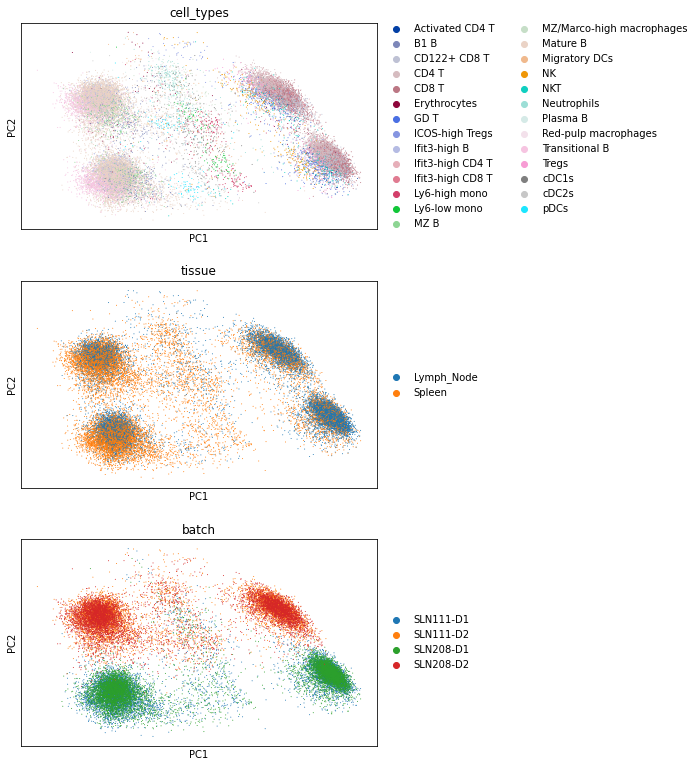

In [21]:
sc.pl.pca(scrna, color=['cell_types', 'tissue', 'batch'], ncols=1)

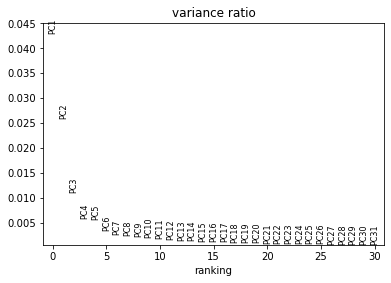

In [22]:
sc.pl.pca_variance_ratio(scrna)

In [23]:
sc.pp.neighbors(scrna, n_pcs=10)
sc.tl.umap(scrna)

In [24]:
scrna

AnnData object with n_obs × n_vars = 30293 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'cell_types_colors', 'tissue_colors', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

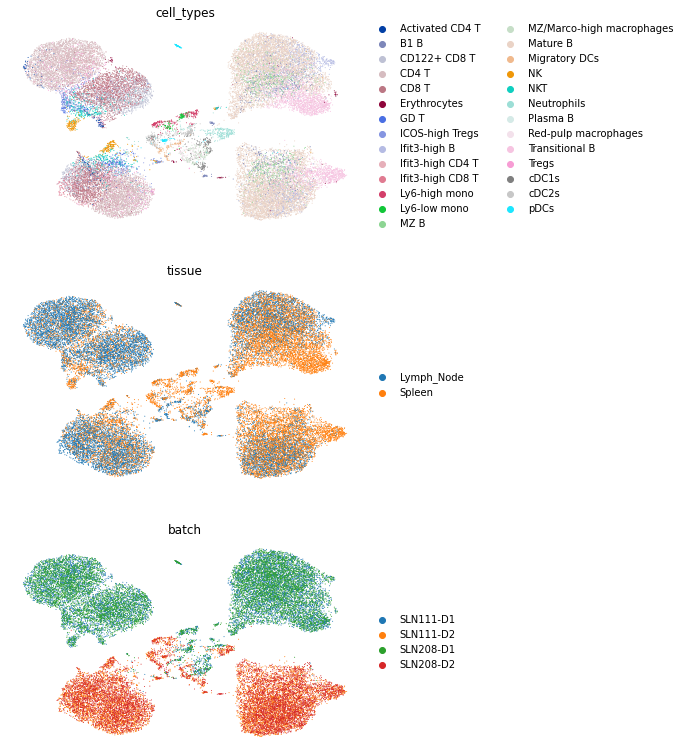

In [25]:
sc.pl.umap(scrna, color=['cell_types', 'tissue', 'batch'], frameon=False, ncols=1)

## Highly variable genes

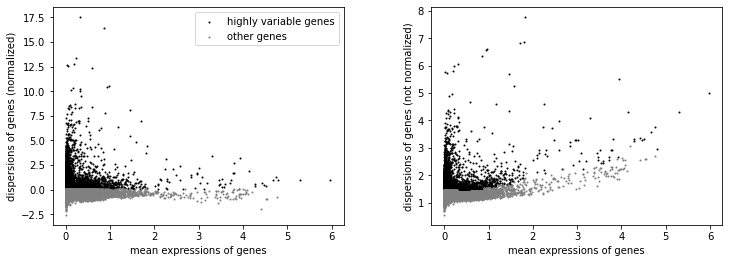

number of highly variable genes = 4000


In [26]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4001)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [27]:
scrna_hvg = scrna[:, scrna.var.highly_variable]
scrna_hvg

View of AnnData object with n_obs × n_vars = 30293 × 4000
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'cell_types_colors', 'tissue_colors', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [28]:
scrna_hvg.layers['count'] = scrna_hvg.raw[:, scrna.var.highly_variable].X
scrna_hvg

AnnData object with n_obs × n_vars = 30293 × 4000
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'cell_types_colors', 'tissue_colors', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'distances', 'connectivities'

In [29]:
scrna.layers['count'] = scrna.raw.X
scrna

AnnData object with n_obs × n_vars = 30293 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'cell_types_colors', 'tissue_colors', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'distances', 'connectivities'

In [30]:
del scrna_hvg.raw
del scrna.raw

# Preprocess CITE-seq

In [31]:
sc.pp.filter_cells(cite, min_genes=1)
sc.pp.filter_genes(cite, min_cells=1)
cite

AnnData object with n_obs × n_vars = 30474 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'

In [32]:
cite.raw = cite

## Quality control

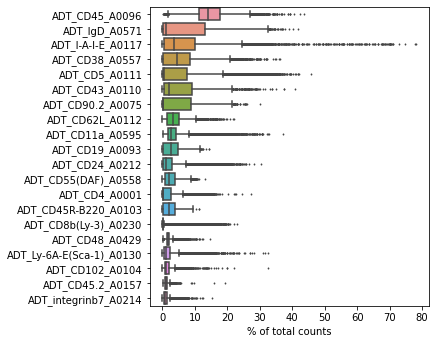

In [33]:
sc.pl.highest_expr_genes(cite, n_top=20)

## Normalization
Taken from https://github.com/theislab/scanpy/issues/1208, also discussed in https://github.com/theislab/scanpy/pull/1117.

In [34]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [35]:
cite = clr_normalize_each_cell(cite)

## Visualization

In [36]:
sc.tl.pca(cite, random_state=0, svd_solver='arpack', n_comps=50)

... storing 'batch' as categorical


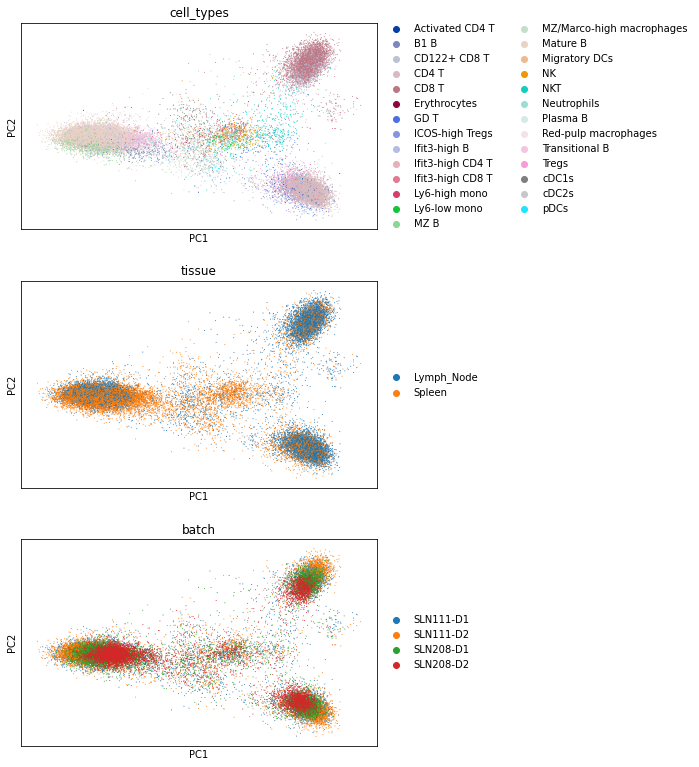

In [37]:
sc.pl.pca(cite, color=['cell_types', 'tissue', 'batch'], ncols=1)

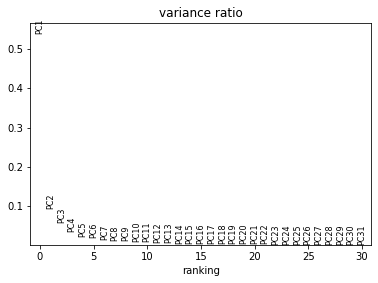

In [38]:
sc.pl.pca_variance_ratio(cite)

In [39]:
sc.pp.neighbors(cite, n_pcs=10)
sc.tl.umap(cite)

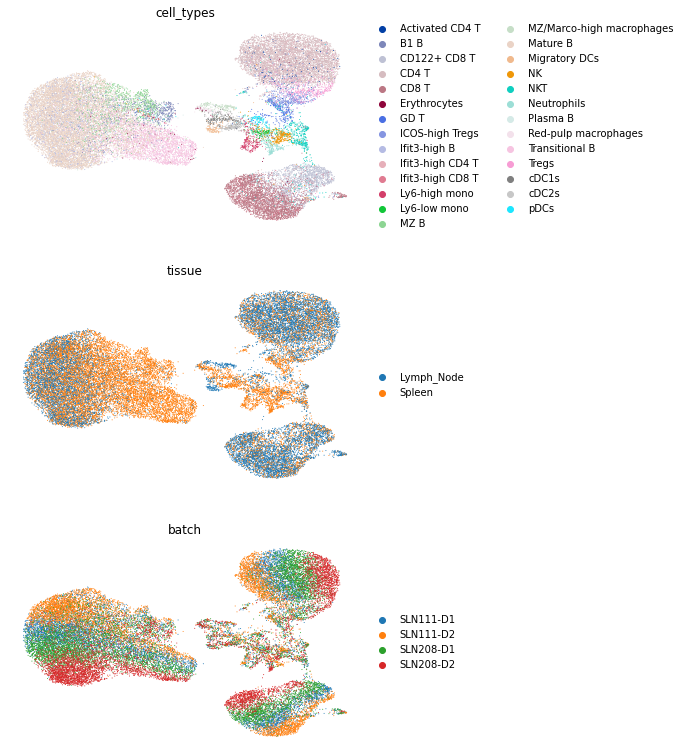

In [40]:
sc.pl.umap(cite, color=['cell_types', 'tissue', 'batch'], frameon=False, ncols=1)

In [41]:
cite.layers['count'] = cite.raw.X
cite

AnnData object with n_obs × n_vars = 30474 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'pca', 'cell_types_colors', 'tissue_colors', 'batch_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'distances', 'connectivities'

In [42]:
del cite.raw

# Save the results

## All genes

In [43]:
com_index = scrna.obs.index.intersection(cite.obs.index)
scrna_all = scrna[com_index]
cite_all = cite[com_index]
print(scrna_all.shape, cite_all.shape)

(30293, 13553) (30293, 110)


In [44]:
scrna_all.write(SCRNA_DIR + 'expressions.h5ad')

In [45]:
cite_all.write(SCCITE_DIR + 'protein.h5ad')

## Only hvg

In [46]:
com_index = set(scrna_hvg.obs.index) & set(cite.obs.index)
scrna_hvg = scrna_hvg[scrna_hvg.obs.index.isin(com_index)]
cite_hvg = cite[cite.obs.index.isin(com_index)]
print(scrna_hvg.shape, cite_hvg.shape)

(30293, 4000) (30293, 110)


In [47]:
scrna_hvg.write(SCRNA_DIR + 'expressions_hvg.h5ad')

Remove unnecessary files.

In [48]:
!rm '../data/gayoso-2020/sln_111.h5ad'
!rm '../data/gayoso-2020/sln_208.h5ad'